In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [2]:
# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here, but you will need to set
# dark_mode = False

dark_mode = True
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

In [9]:
# maximum number of lily pads, plus one!!!!  In other words, n = 1 corresponds to zero lily
# pads.  The point here is that all of the sums/formulas/etc. always go up to n+1, so let's
# just rescale the problem 

nmax = 30

In [10]:
random.seed(1)

In [17]:
# some variables to keep track of where the frog is, how many jumps he has taken for
# this iteration of the simulation, and how many total jumps he has taken across all
# iterations.
pos = 0
jumpsum = 0
total_jumps = 0

# how many times we will run the simulation
n_trys = 100000

# create some arrays to hold various quantities, as a function of n.  We want to
# run the simulation for n = 1 ... nmax
x = []
y = []
eval = [] # this will be used for intermediate steps in the recursion method
evalr = [] # this will be for the recursion method - it is just eval[] shifted by one, 
evalh = [] # this will be used for the harmonic mean method/
sigma = []

In [18]:
for npad in range(1,nmax+1): 

    if (npad == 1):
        eval.append(1)
        evalr.append(1)
    else:
        sum = 0.0
        for i in range(1,npad):
            sum = sum + 1.0/npad*(1.0+eval[npad-i-1])
        sum = sum + 1.0/npad
        eval.append(sum)
        evalr.append(eval[npad-1])
    print("Theory: ",npad,eval[npad-1],evalr[npad-1])
    
    x.append(npad)
    
    sum2 = 1.0/stats.hmean(x)*npad
    evalh.append(sum2)
    
    print ("Theory 2: ",npad,sum2)
    
    end = npad
    
    # simulate the process of getting across the stream n_trys times
    for j in range(n_trys):
        
        # main simulation loop
        while pos < npad:
            jump = int(random.uniform(1,(end-pos+1)))
            pos = pos + jump
            jumpsum = jumpsum + 1
        
        # reset pos to zero, add to total jumps, reset jumpsum
        pos = 0
        total_jumps = total_jumps + jumpsum
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    expectation_value = total_jumps/n_trys*1.0
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f +/- %f" % (npad,expectation_value,expectation_value*1/np.sqrt(n_trys)))
    

Theory:  1 1 1
Theory 2:  1 1.0
Expectation value for n = 1 is 1.000000 +/- 0.003162
Theory:  2 1.5 1.5
Theory 2:  2 1.5
Expectation value for n = 2 is 1.498970 +/- 0.004740
Theory:  3 1.8333333333333333 1.8333333333333333
Theory 2:  3 1.833333333333333
Expectation value for n = 3 is 1.835430 +/- 0.005804
Theory:  4 2.083333333333333 2.083333333333333
Theory 2:  4 2.083333333333333
Expectation value for n = 4 is 2.079950 +/- 0.006577
Theory:  5 2.2833333333333337 2.2833333333333337
Theory 2:  5 2.283333333333333
Expectation value for n = 5 is 2.282740 +/- 0.007219
Theory:  6 2.4499999999999997 2.4499999999999997
Theory 2:  6 2.4499999999999997
Expectation value for n = 6 is 2.448110 +/- 0.007742
Theory:  7 2.5928571428571425 2.5928571428571425
Theory 2:  7 2.592857142857143
Expectation value for n = 7 is 2.589180 +/- 0.008188
Theory:  8 2.7178571428571425 2.7178571428571425
Theory 2:  8 2.7178571428571425
Expectation value for n = 8 is 2.718190 +/- 0.008596
Theory:  9 2.828968253968253

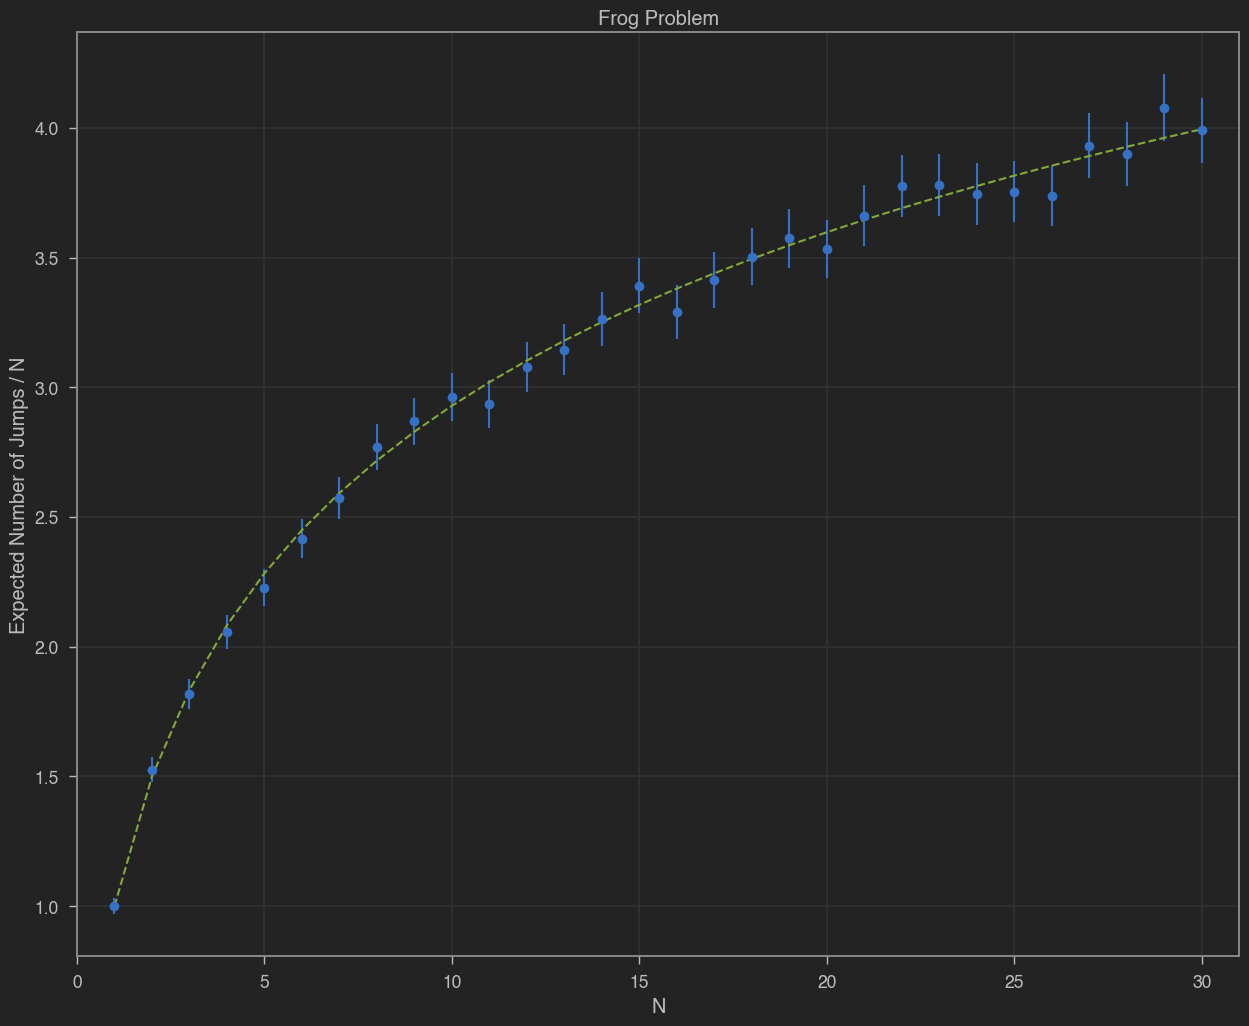

In [15]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(0,nmax+1)
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
#ax1.plot(x,evalr,'r--')
ax1.plot(x,evalh,'g--')


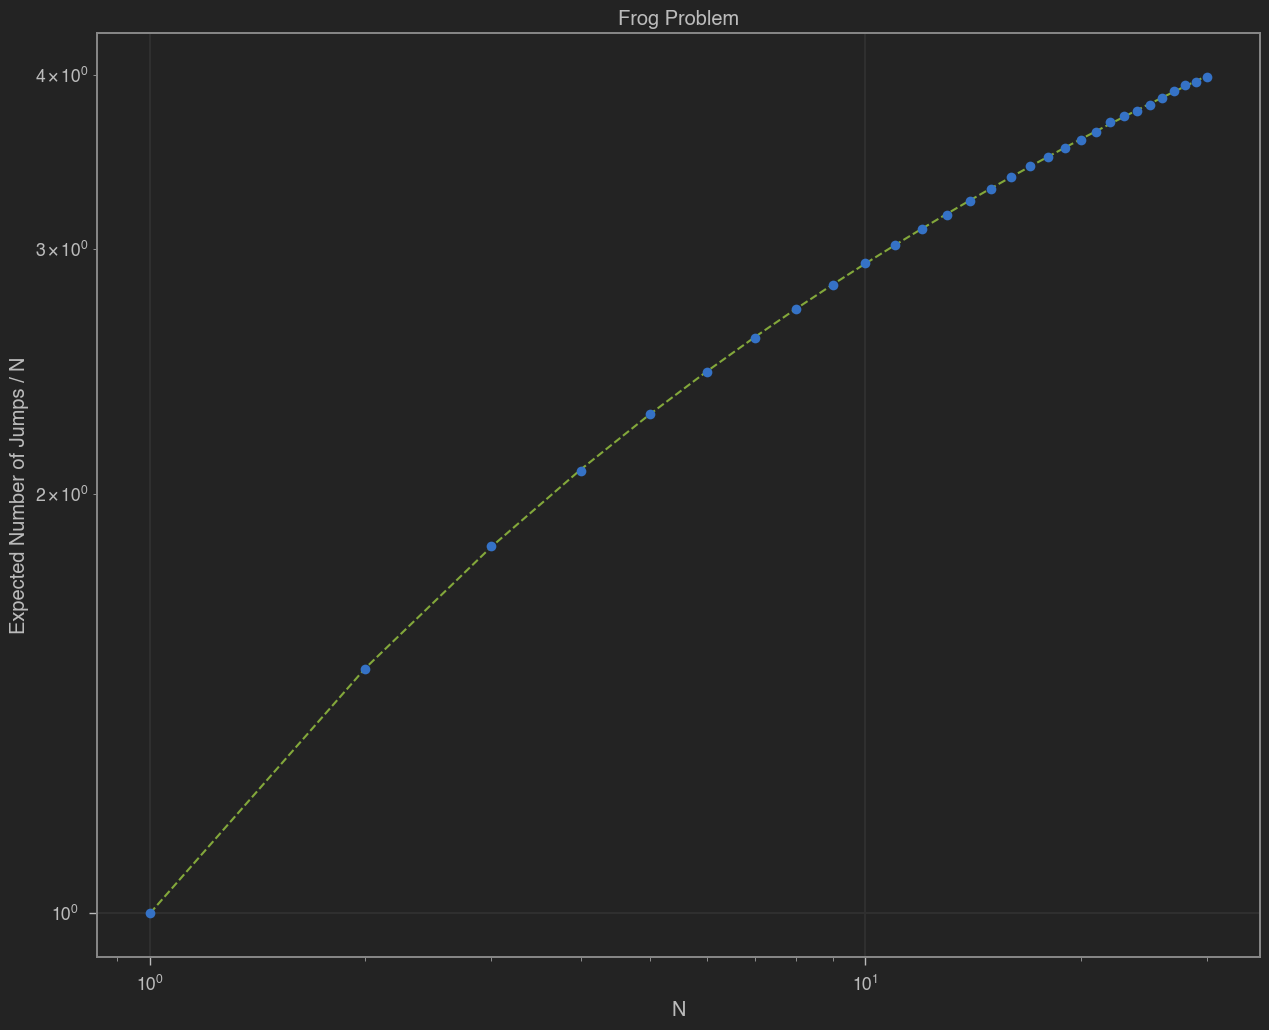

In [19]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
#ax1.plot(x,evalr,'r--')
ax1.plot(x,evalh,'g--')